In [22]:
url='http://www.bjsubway.com/station/zjgls/#'

In [23]:
import urllib.request

In [24]:
response = urllib.request.urlopen(url)

In [25]:
html= response.read().decode('gb18030')

In [26]:
html

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<title>站间公里数 | 北京地铁官方网站</title>\r\n<meta name="keywords" content="北京地铁官方网站,首末车时间" />\r\n<meta name="description" content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" />\r\n<link rel="shortcut icon" href="http://www.bjsubway.com/favicon.ico" type="image/x-icon" />\r\n<link href="http://www.bjsubway.com/subway/css/common.css" rel="stylesheet" type="text/css" />\r\n<link href="http://www.bjsubway.com/subway/css/search.css" rel="stylesheet" type="text/css" />\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/jquery.js"></script>\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/around.js"></script>\r\n<script type="text/javascript">\r\n/*线路名称多窗口切换效果*/\r\nfunction GetId(id){\r\n  return document.getElementBy

In [27]:
webText = open('./subway.txt','w',encoding = 'gb18030')
webText.write(html)

62787

In [38]:
import re
from bs4 import BeautifulSoup

In [41]:
def get_station_info(textStream):
    subway_pattern = re.compile('<th>.{0,100}</th>\r\n\s+<td.*>\d{0,8}</td>')
    replace_pattern = re.compile('[^(<.*th>|\r|\n|<td>|</td>)]')

    #replace_pattern = re.compile('<.*th>')
    temp_findth=subway_pattern.findall(str(textStream))
       
    if temp_findth:
        temp_findth[0]=temp_findth[0].replace("<td width=\"146\">",'<td>')
    subway_list=list()
    for i in temp_findth:
        i=''.join(re.findall(replace_pattern,str(i)))
        i=i.replace('T3','3号')
        i=i.replace('T2','2号')
        i=i.replace('——',' ')
        i=i.replace('    ',' ')
        i=i.replace('   ',' ')
        i=i.replace('  ',' ')
        subway_list.append(i)

    station_list=list()
    for i in subway_list:
        temp=i.split(' ')
        station_list.append(temp)
    return station_list

station_list=get_station_info(html)

print(station_list[:10])

[['苹果园', '古城', '2606'], ['古城', '八角游乐园', '1921'], ['八角游乐园', '八宝山', '1953'], ['八宝山', '玉泉路', '1479'], ['玉泉路', '五棵松', '1810'], ['五棵松', '万寿路', '1778'], ['万寿路', '公主坟', '1313'], ['公主坟', '军事博物馆', '1172'], ['军事博物馆', '木樨地', '1166'], ['木樨地', '南礼士路', '1291']]


In [42]:
import networkx as nx
%matplotlib inline

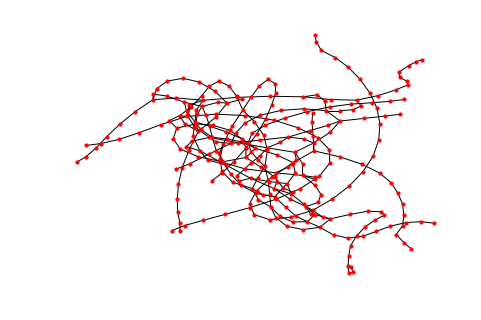

In [47]:
connection_graph = {}
for i in station_list:
    if i[0] in connection_graph and i[1] in connection_graph:
        connection_graph[i[0]].append(i[1])
        connection_graph[i[1]].append(i[0])
        
    elif i[0] in connection_graph and not i[1] in connection_graph:
        connection_graph[i[1]] = [i[0]]
        connection_graph[i[0]].append(i[1])
    elif i[1] in connection_graph and not i[0] in connection_graph:
        connection_graph[i[0]] = [i[1]]
        connection_graph[i[1]].append(i[0])
        
    else:
        connection_graph[i[0]] = [i[1]]
        connection_graph[i[1]] = [i[0]]

g = nx.Graph(connection_graph)
nx.draw(g,with_label = True,node_size = 10)

In [49]:
def is_goal(next_station, destination):
    if next_station == destination:
        return True
    else:
        return False
    
def get_successor(froniter):
    successors = connection_graph[froniter]
    return successors

def Search_agent(start,destination,connection_graph,strategy):
    
    pathes = [[start]]
    result = list()
    seen = set()
    
    if strategy =='bfs':
        strategy = 0
    else:
        strategy = -1
    
    while pathes:
        path = pathes.pop(strategy)
        froniter = path[-1]
        
        try:
            get_successor(froniter)
            successors = get_successor(froniter)
        except KeyError:
            print('Not such station,try again')
            return ''
        
        for s in successors:
            if s in seen:
                continue
            if is_goal(s,destination):
                path.append(path)
                return path
            else:
                pathes.append(path+[s])
                
        pathes = sorted(pathes,key=len)
        seen.add(froniter)
    return result

In [50]:
print(Search_agent('五棵松','北沙滩',connection_graph,'bfs'))

['五棵松', '万寿路', '公主坟', '军事博物馆', '白堆子', '白石桥南', '车公庄西', '车公庄', '西直门', '积水潭', '鼓楼大街', '安德里北街', '安华桥', '北土城', '奥体中心', '奥林匹克公园', [...]]


In [51]:
print(Search_agent('五棵松','北沙滩',connection_graph,'dfs'))

['五棵松', '万寿路', '公主坟', '西钓鱼台', '慈寿寺', '车道沟', '长春桥', '火器营', '巴沟', '苏州街', '海淀黄庄', '知春里', '知春路', '五道口', '上地', '西二旗', '生命科学园', '朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '立水桥', '北苑', '望京西', '望京', '阜通', '望京南', '高家园', '将台', '东风北桥', '枣营', '朝阳公园', '金台路', '红庙', '大望路', '九龙山', '平乐园', '北工大西门', '南八里庄', '十里河', '方庄', '蒲黄榆', '景泰', '永定门外', '陶然桥', '北京南站', '马家堡', '角门西', '草桥', '纪家庙', '首经贸', '丰台站', '泥洼', '西局', '七里庄', '六里桥', '六里桥东', '北京西站', '军事博物馆', '白堆子', '白石桥南', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '北海北', '南锣鼓巷', '什刹海', '鼓楼大街', '安德里北街', '安华桥', '北土城', '安贞门', '惠新西街南口', '惠新西街北口', '大屯路东', '安立路', '奥林匹克公园', [...]]


In [55]:
def find_distance(first,second):
    for items in station_list:
        if items[0]==first and items[1]==second:
            return items[2]
        if items[0]==second and items[1]==first:
            return items[2]

def Shortest_Path_Priority(start,destination,connection_graph):
    pathes=[[start]]
    result=list()
    best_result=list()
    #print(pathes)
    seen=set()
    
    while pathes:
        #print(pathes)
        path=pathes.pop(0)        
        froniter=path[-1]
        
        try:
            get_successor(froniter)
            successors=get_successor(froniter)
        except KeyError:
            print("Not such station, please try another.")
            return ''
        
        for s in successors:

            if s in seen:
                continue
            if is_goal(s,destination): 
                path.append(s)
                result.append(path)
            else:
                pathes.append(path+[s])

        pathes=sorted(pathes,key=len)
        seen.add(froniter)
    smallest_distance=1000000000
    for path in result:
        i=len(path)
        distance = 0        
        for j in range(0,i-1):
            distance+=int(find_distance(path[j],path[j+1]))
        
        if smallest_distance>distance:
            smallest_distance=distance
            best_result=path 
        
        print(path)
        print('Total:{} km'.format(distance/1000))
    
    return best_result,smallest_distance/1000

SPP_result,distan=Shortest_Path_Priority('复兴门','雍和宫',connection_graph)
print('\nSPP: '+str(len(SPP_result))+'站 '+'距离：'+str(distan)+'km  '+'->'.join(SPP_result))

['复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫']
Total:9.397 km
['复兴门', '阜成门', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '张自忠路', '北新桥', '雍和宫']
Total:11.515 km
['复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫']
Total:12.43 km
['复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫']
Total:9.824 km
['复兴门', '西单', '灵境胡同', '西四', '平安里', '北海北', '南锣鼓巷', '东四', '张自忠路', '北新桥', '雍和宫']
Total:11.85 km
['复兴门', '阜成门', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东四十条', '东直门', '雍和宫']
Total:14.32 km
['复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安德里北街', '安华桥', '北土城', '安贞门', '惠新西街南口', '和平西桥', '和平里北街', '雍和宫']
Total:15.978 km

SPP: 8站 距离：9.397km  复兴门->阜成门->车公庄->西直门->积水潭->鼓楼大街->安定门->雍和宫


In [56]:
def find_distance(first,second):
    for items in station_list:
        if items[0]==first and items[1]==second:
            return items[2]
        if items[0]==second and items[1]==first:
            return items[2]

def Shortest_Path_Priority(start,destination,connection_graph):
    pathes=[[start]]
    result=list()
    best_result=list()
    #print(pathes)
    seen=set()
    
    while pathes:
        #print(pathes)
        path=pathes.pop(0)        
        froniter=path[-1]
        
        try:
            get_successor(froniter)
            successors=get_successor(froniter)
        except KeyError:
            print("Not such station, please try another.")
            return ''
        
        for s in successors:

            if s in seen:
                continue
            if is_goal(s,destination): 
                path.append(s)
                result.append(path)
            else:
                pathes.append(path+[s])

        pathes=sorted(pathes,key=len)
        seen.add(froniter)
    smallest_distance=1000000000
    for path in result:
        i=len(path)
        distance = 0        
        for j in range(0,i-1):
            distance+=int(find_distance(path[j],path[j+1]))
        
        if smallest_distance>distance:
            smallest_distance=distance
            best_result=path 
        
        print(path)
        print('Total:{} km'.format(distance/1000))
    
    return best_result,smallest_distance/1000

SPP_result,distan=Shortest_Path_Priority('复兴门','雍和宫',connection_graph)
print('\nSPP: '+str(len(SPP_result))+'站 '+'距离：'+str(distan)+'km  '+'->'.join(SPP_result))

['复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫']
Total:9.397 km
['复兴门', '阜成门', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '张自忠路', '北新桥', '雍和宫']
Total:11.515 km
['复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫']
Total:12.43 km
['复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫']
Total:9.824 km
['复兴门', '西单', '灵境胡同', '西四', '平安里', '北海北', '南锣鼓巷', '东四', '张自忠路', '北新桥', '雍和宫']
Total:11.85 km
['复兴门', '阜成门', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东四十条', '东直门', '雍和宫']
Total:14.32 km
['复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安德里北街', '安华桥', '北土城', '安贞门', '惠新西街南口', '和平西桥', '和平里北街', '雍和宫']
Total:15.978 km

SPP: 8站 距离：9.397km  复兴门->阜成门->车公庄->西直门->积水潭->鼓楼大街->安定门->雍和宫
